In [2]:
from omsapi import OMSAPI
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")

In [4]:
dataset_name='SingleMuon'
q_dataset=omsapi.query("datasetrates").paginate(page=1,per_page=1000).filter("run_number",315721).filter("dataset_name",dataset_name)
response_dataset=q_dataset.data()
folded_json_dataset=response_dataset.json()
df_singlemuon=pd.json_normalize(folded_json_dataset['data'])
df_singlemuon.set_index('attributes.first_lumisection_number',inplace=True)
df_singlemuon=df_singlemuon[23:628]

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=SingleMuon&page[offset]=0&page[limit]=1000


In [5]:
df_singlemuon_dict={}
path_name_list=['HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10', 
                'HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10', 
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_v13',
                'HLT_IsoMu24_eta2p1_v13',
                'HLT_IsoMu24_v11',
                'HLT_IsoMu27_v14',
                'HLT_IsoMu30_v2',
                'HLT_L1SingleMu18_v3',
                'HLT_L1SingleMu25_v2',
                'HLT_L2Mu10_v7',
                'HLT_L2Mu50_v2',
                'HLT_Mu10_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT350_PFMETNoMu60_v12',
                'HLT_Mu12_v1',
                'HLT_Mu15_IsoVVVL_PFHT450_CaloBTagCSV_4p5_v7',
                'HLT_Mu15_IsoVVVL_PFHT450_PFMET50_v13',
                'HLT_Mu15_IsoVVVL_PFHT450_v13',
                'HLT_Mu15_IsoVVVL_PFHT600_v17',
                'HLT_Mu15_v1',
                'HLT_Mu20_v11',
                'HLT_Mu27_v12',
                'HLT_Mu3_PFJet40_v14',
                'HLT_Mu50_IsoVVVL_PFHT450_v13',
                'HLT_Mu50_v12',
                'HLT_Mu55_v2',
                'HLT_Mu8_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT300_PFMETNoMu60_v13',
                'HLT_OldMu100_v3',
                'HLT_TkMu100_v2']
for i in path_name_list : 
    q = omsapi.query("hltpathrates").paginate(page=1, per_page=1000).filter("run_number",315721).filter("path_name",i)
    response=q.data()
    folded_json=response.json()
    df=pd.json_normalize(folded_json['data'])
    df.set_index('attributes.first_lumisection_number',inplace=True)
    df=df[23:628]
    df_singlemuon_dict[i]=df

https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1&page[offset]=0&page[limit]=1000


## 1. All  SingleMuon Paths

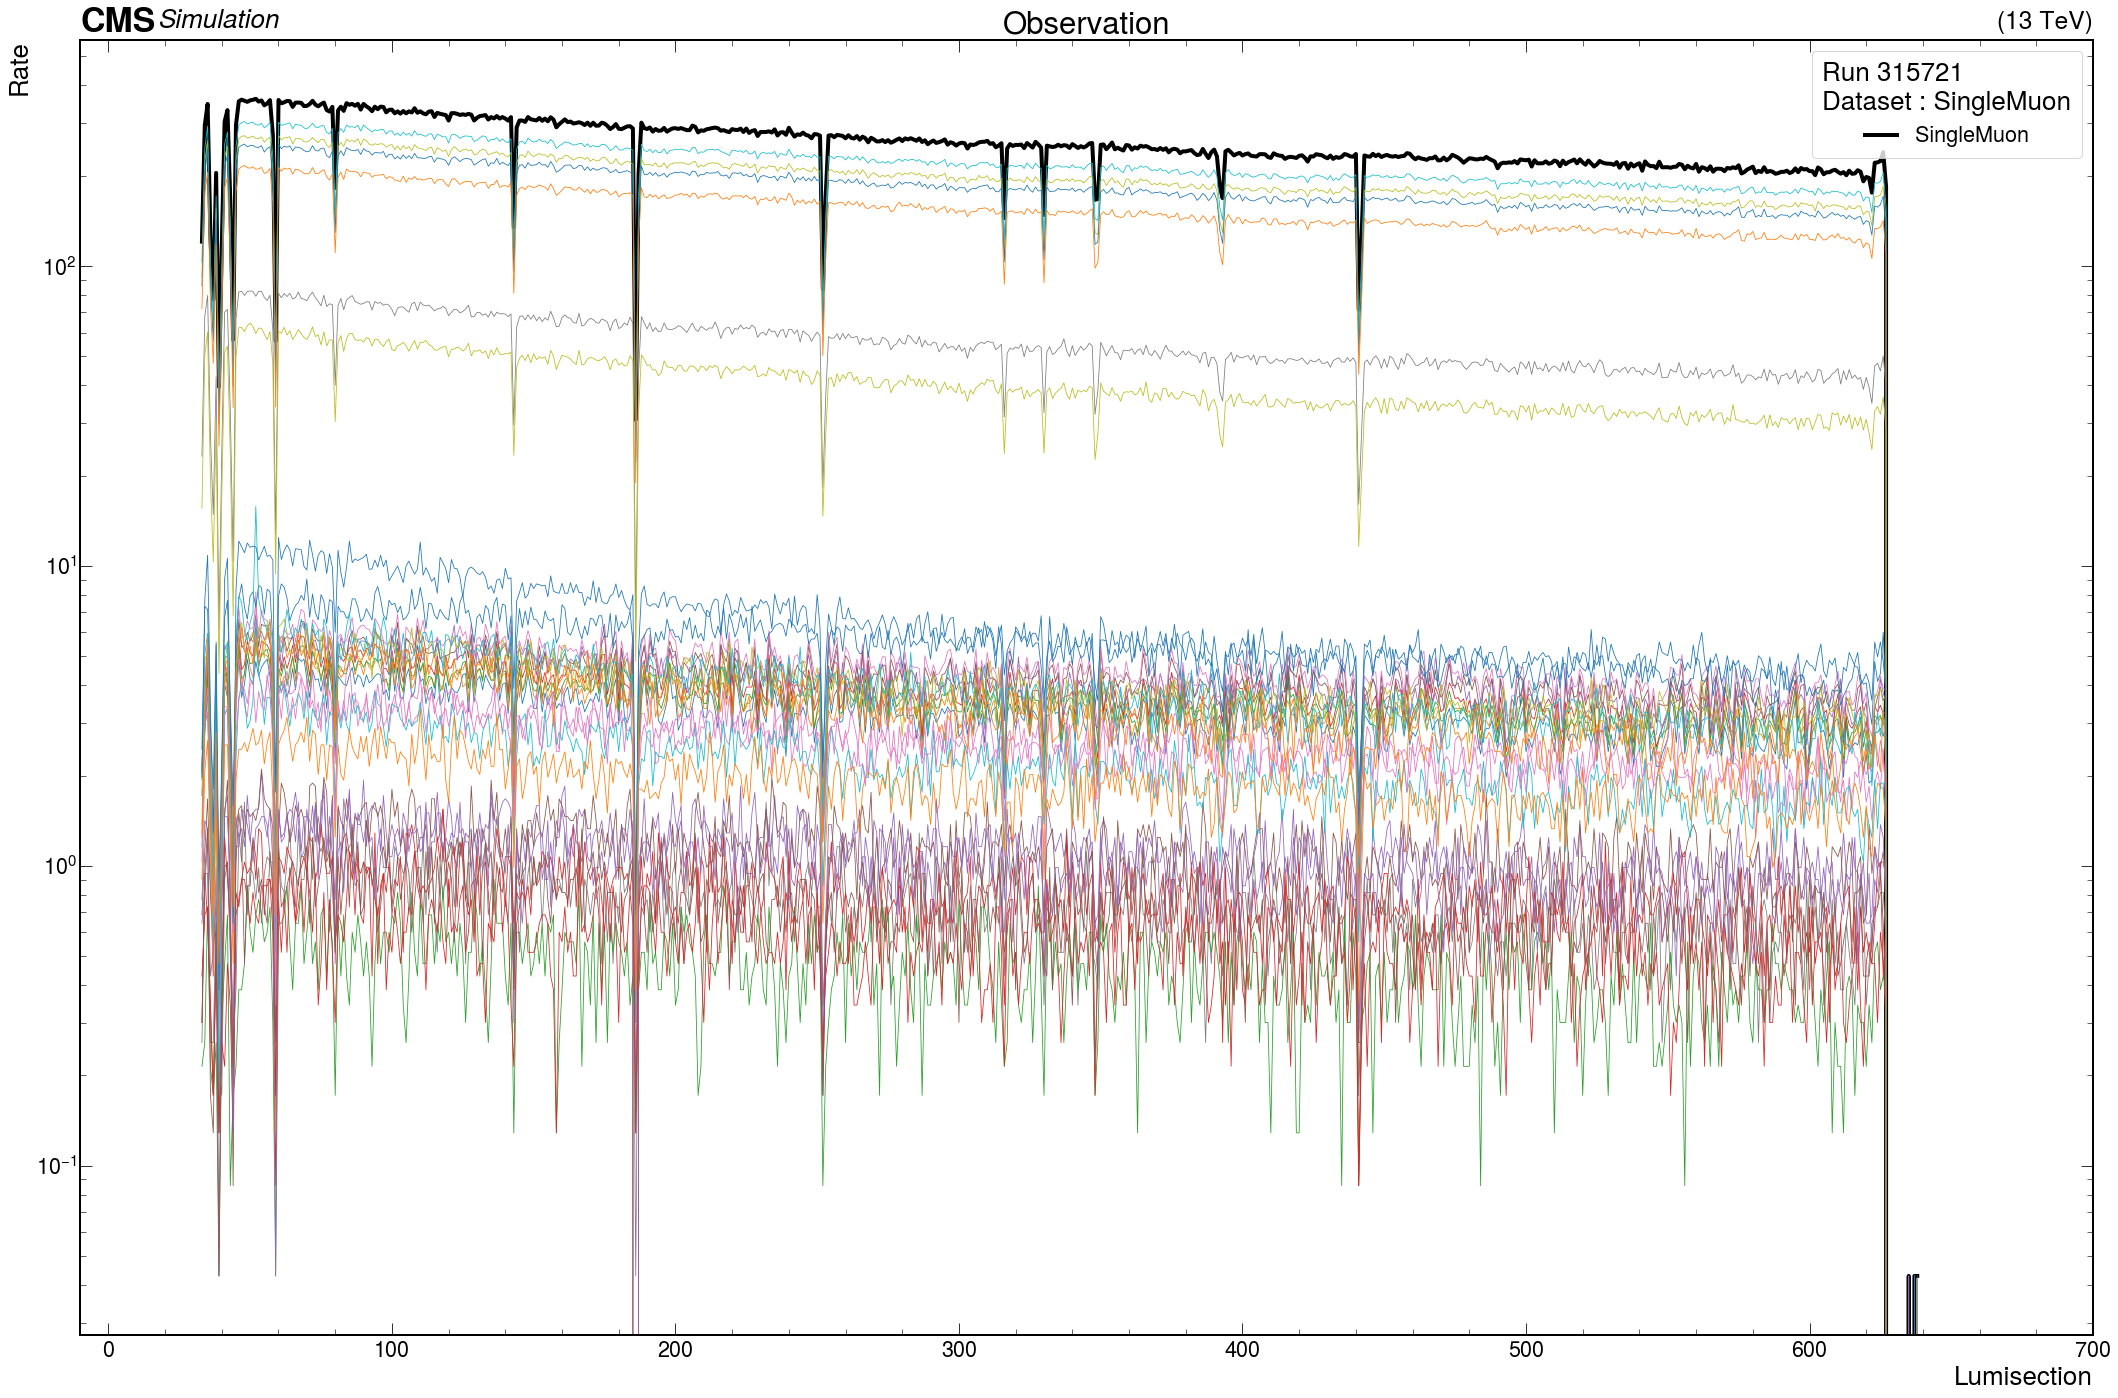

In [6]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon['attributes.rate'],label='SingleMuon',color='black',lw=4)
for i in path_name_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"],lw=0.8)
plt.yscale('log')
plt.title("Observation")
ax.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)
plt.tight_layout()

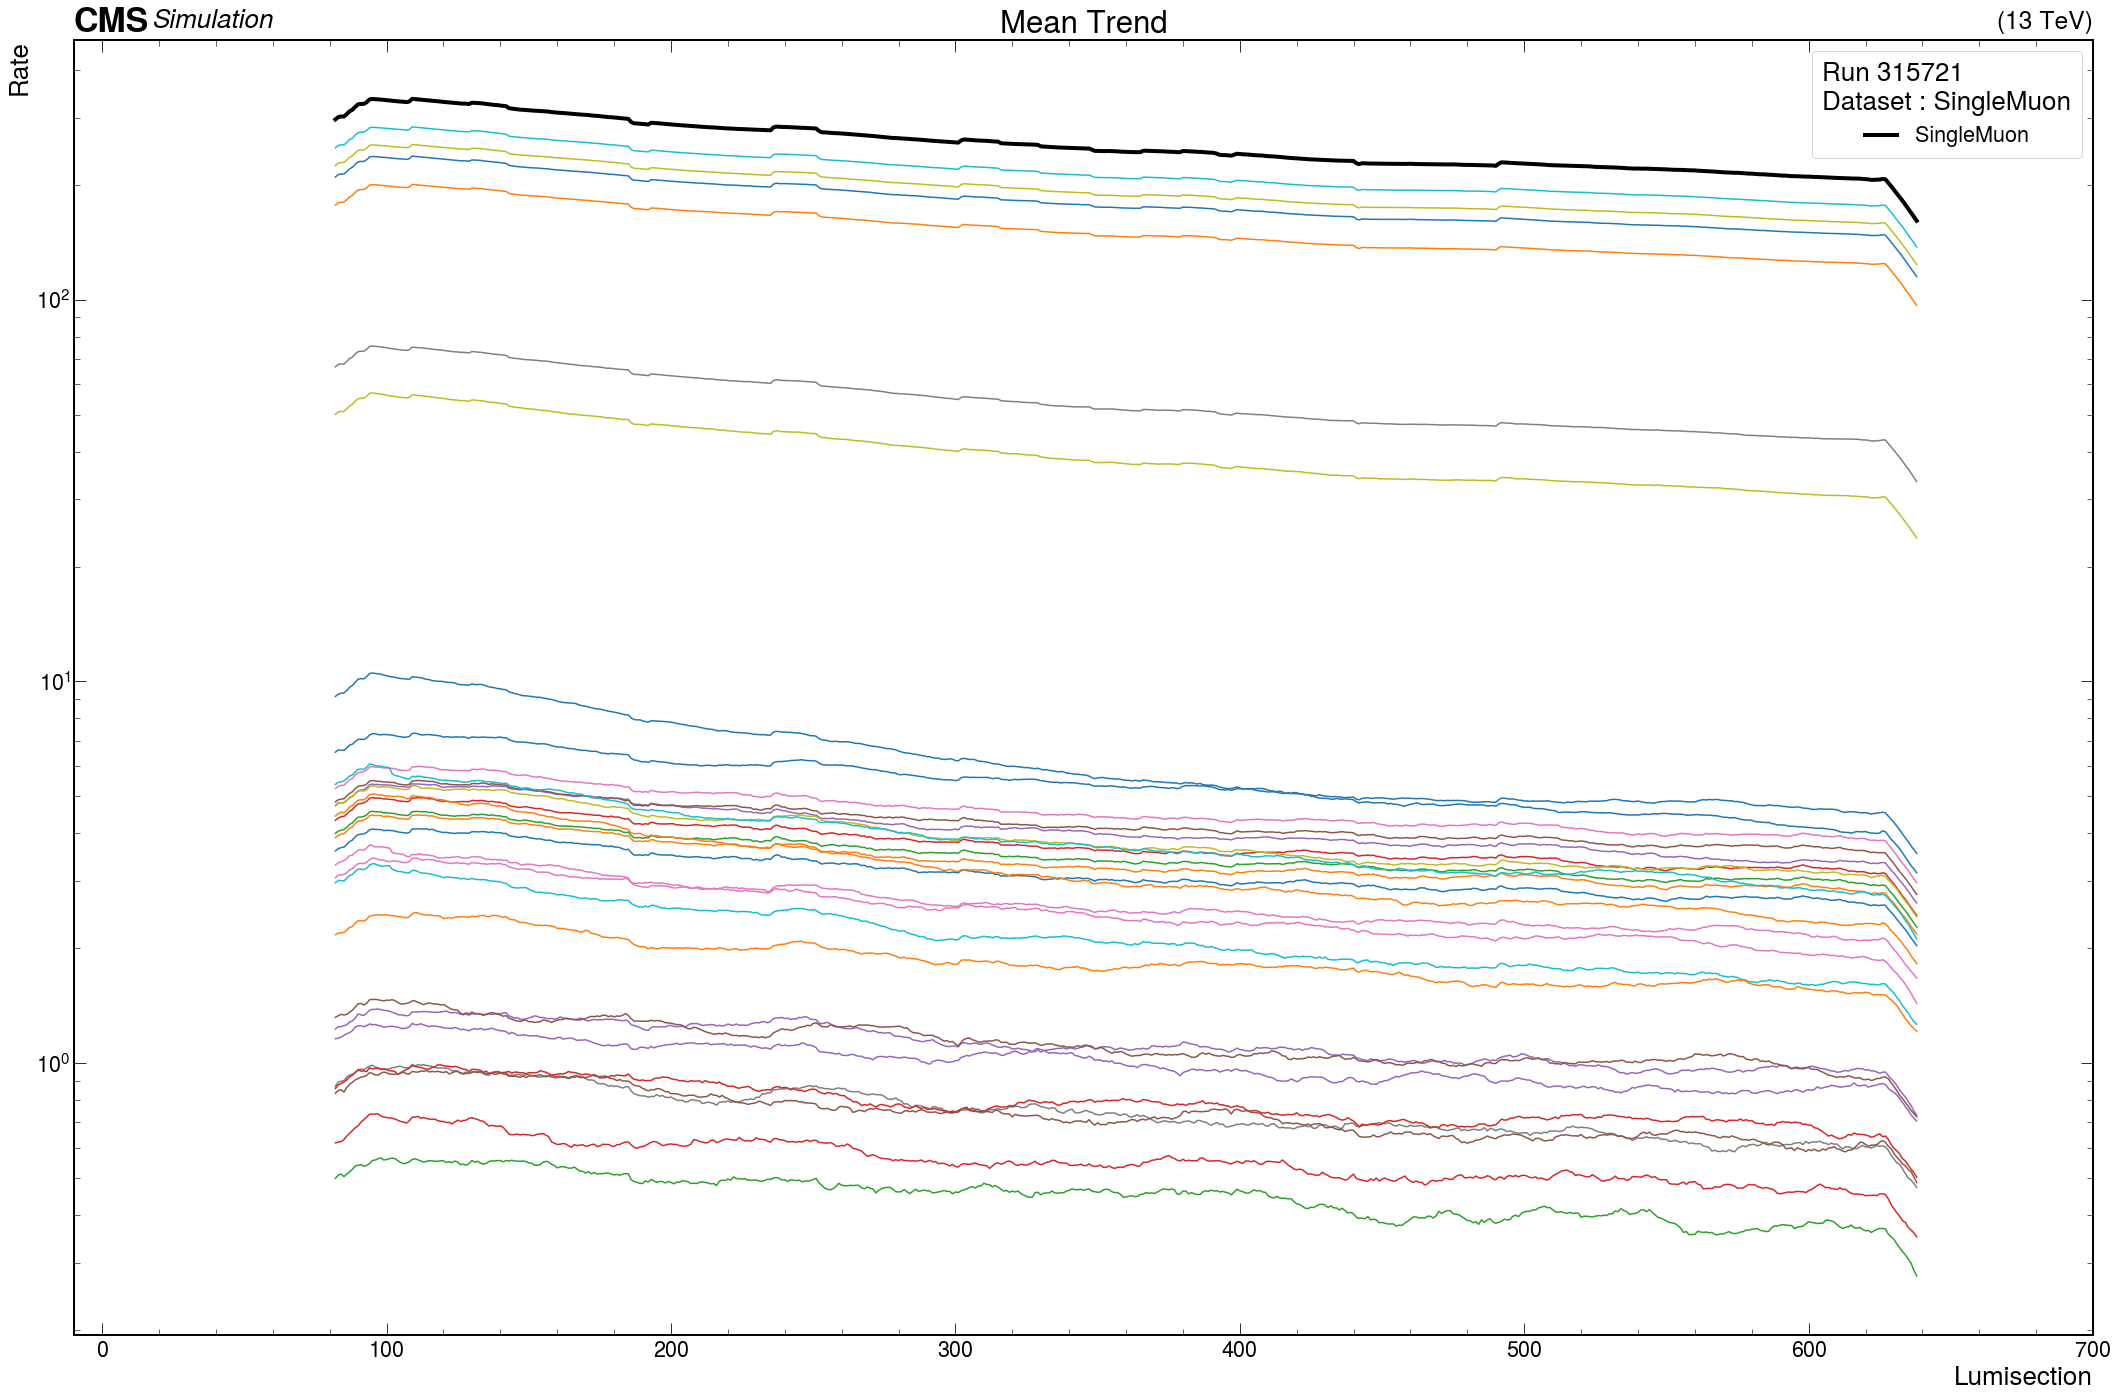

In [7]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"].rolling(window=50).mean(),label='SingleMuon',color='black',lw=4)
for i in df_singlemuon_dict.keys():
    plt.plot(df_singlemuon_dict[i]["attributes.rate"].rolling(window=50).mean())
plt.yscale('log')
plt.title("Mean Trend")
ax.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
#plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)
plt.tight_layout()

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


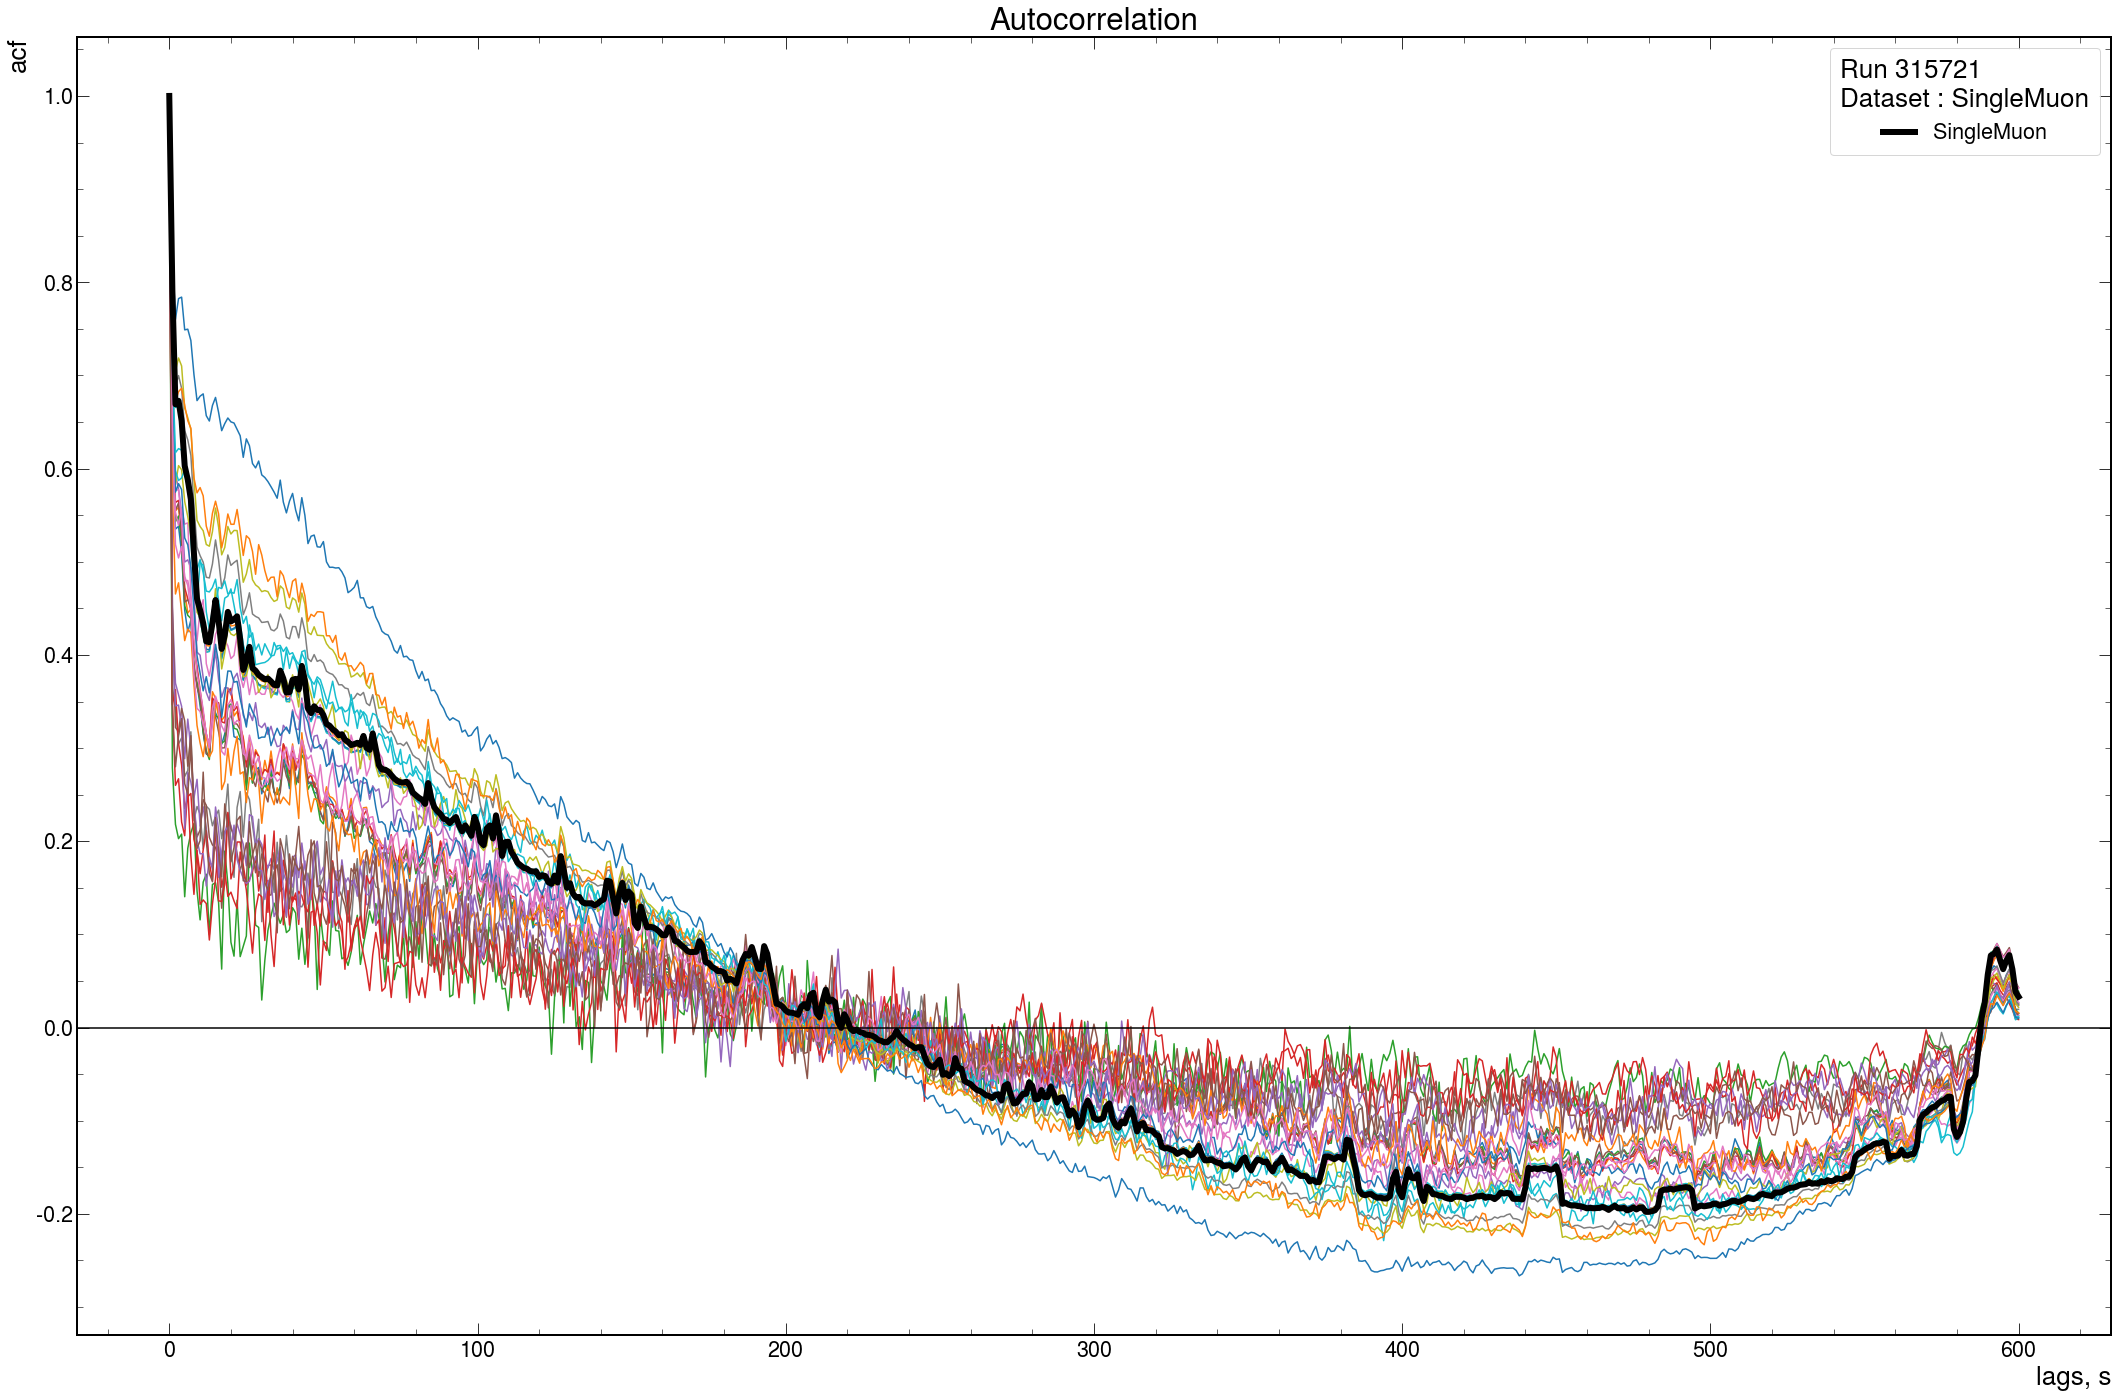

In [8]:
plt.subplots(figsize=(30,20))
for i in df_singlemuon_dict.keys():
    plt.plot(acf(df_singlemuon_dict[i]['attributes.rate'],nlags=600,fft=False))
plt.plot(acf(df_singlemuon['attributes.rate'],nlags=600,fft=False),label=df_singlemuon['attributes.dataset_name'][33],lw=6,color='black')
plt.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
plt.title('Autocorrelation')
plt.xlabel('lags, s')
plt.ylabel('acf')
plt.axhline(color='black')
plt.tight_layout()

## 2. HLT IsoMu24

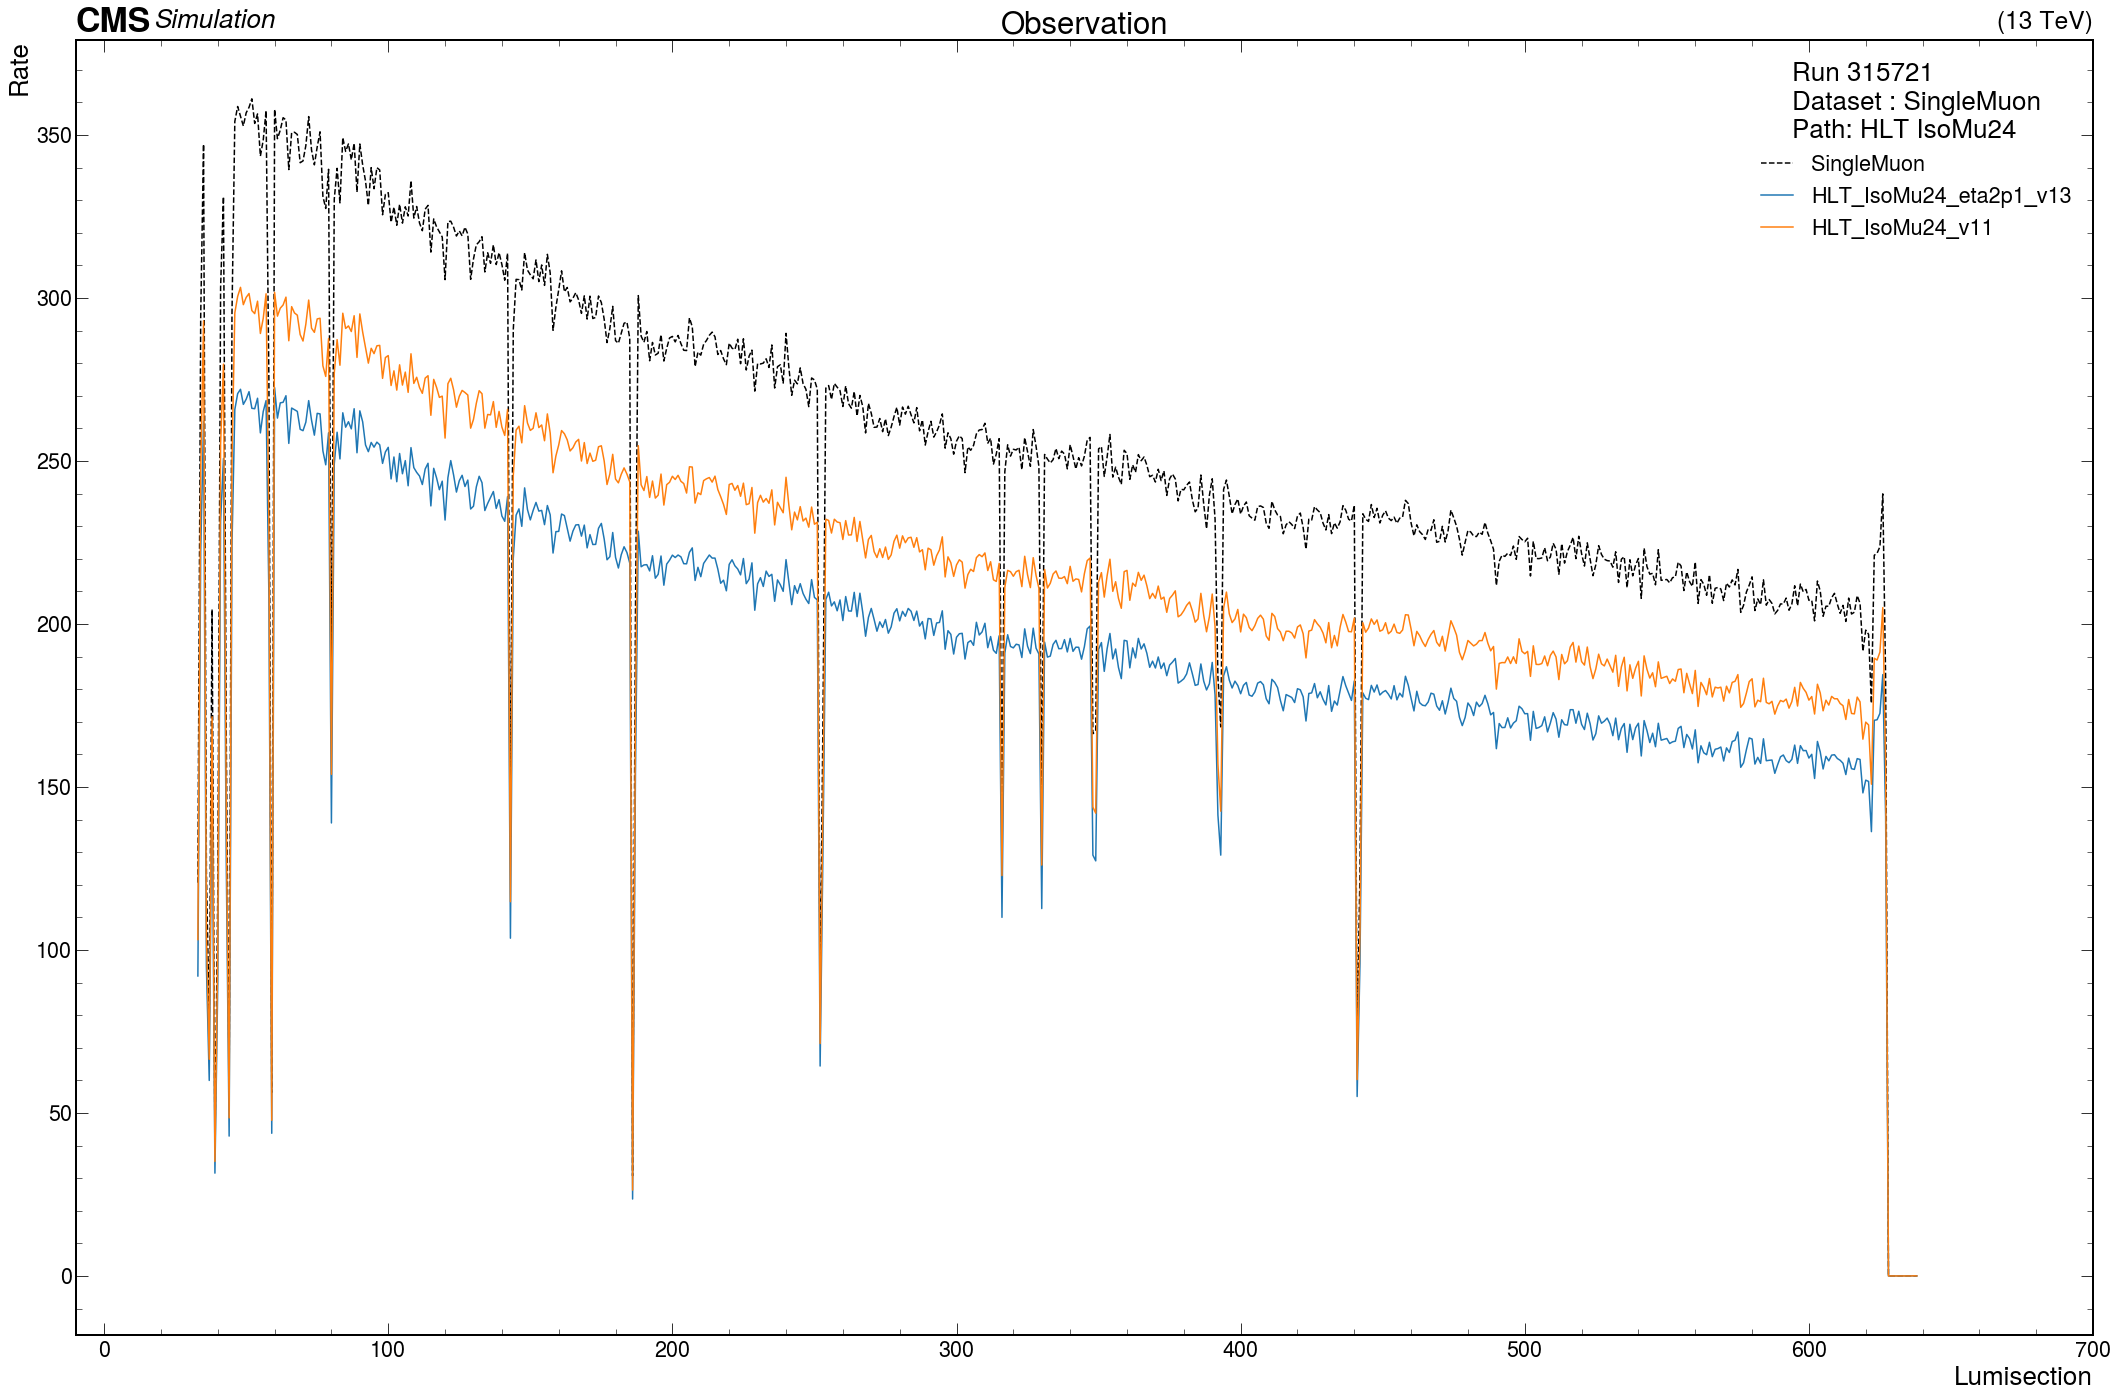

In [9]:
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
path_IsoMu24_list=['HLT_IsoMu24_eta2p1_v13',
                'HLT_IsoMu24_v11']
plt.plot(df_singlemuon['attributes.rate'],label='SingleMuon',color='black',ls='--')
for i in path_IsoMu24_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"],label=df_singlemuon_dict[i]['attributes.path_name'][100])
#plt.yscale('log')
plt.title("Observation")
plt.legend(loc=1,title=('Run 315721\nDataset : SingleMuon\nPath: HLT IsoMu24'))
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)
plt.tight_layout()

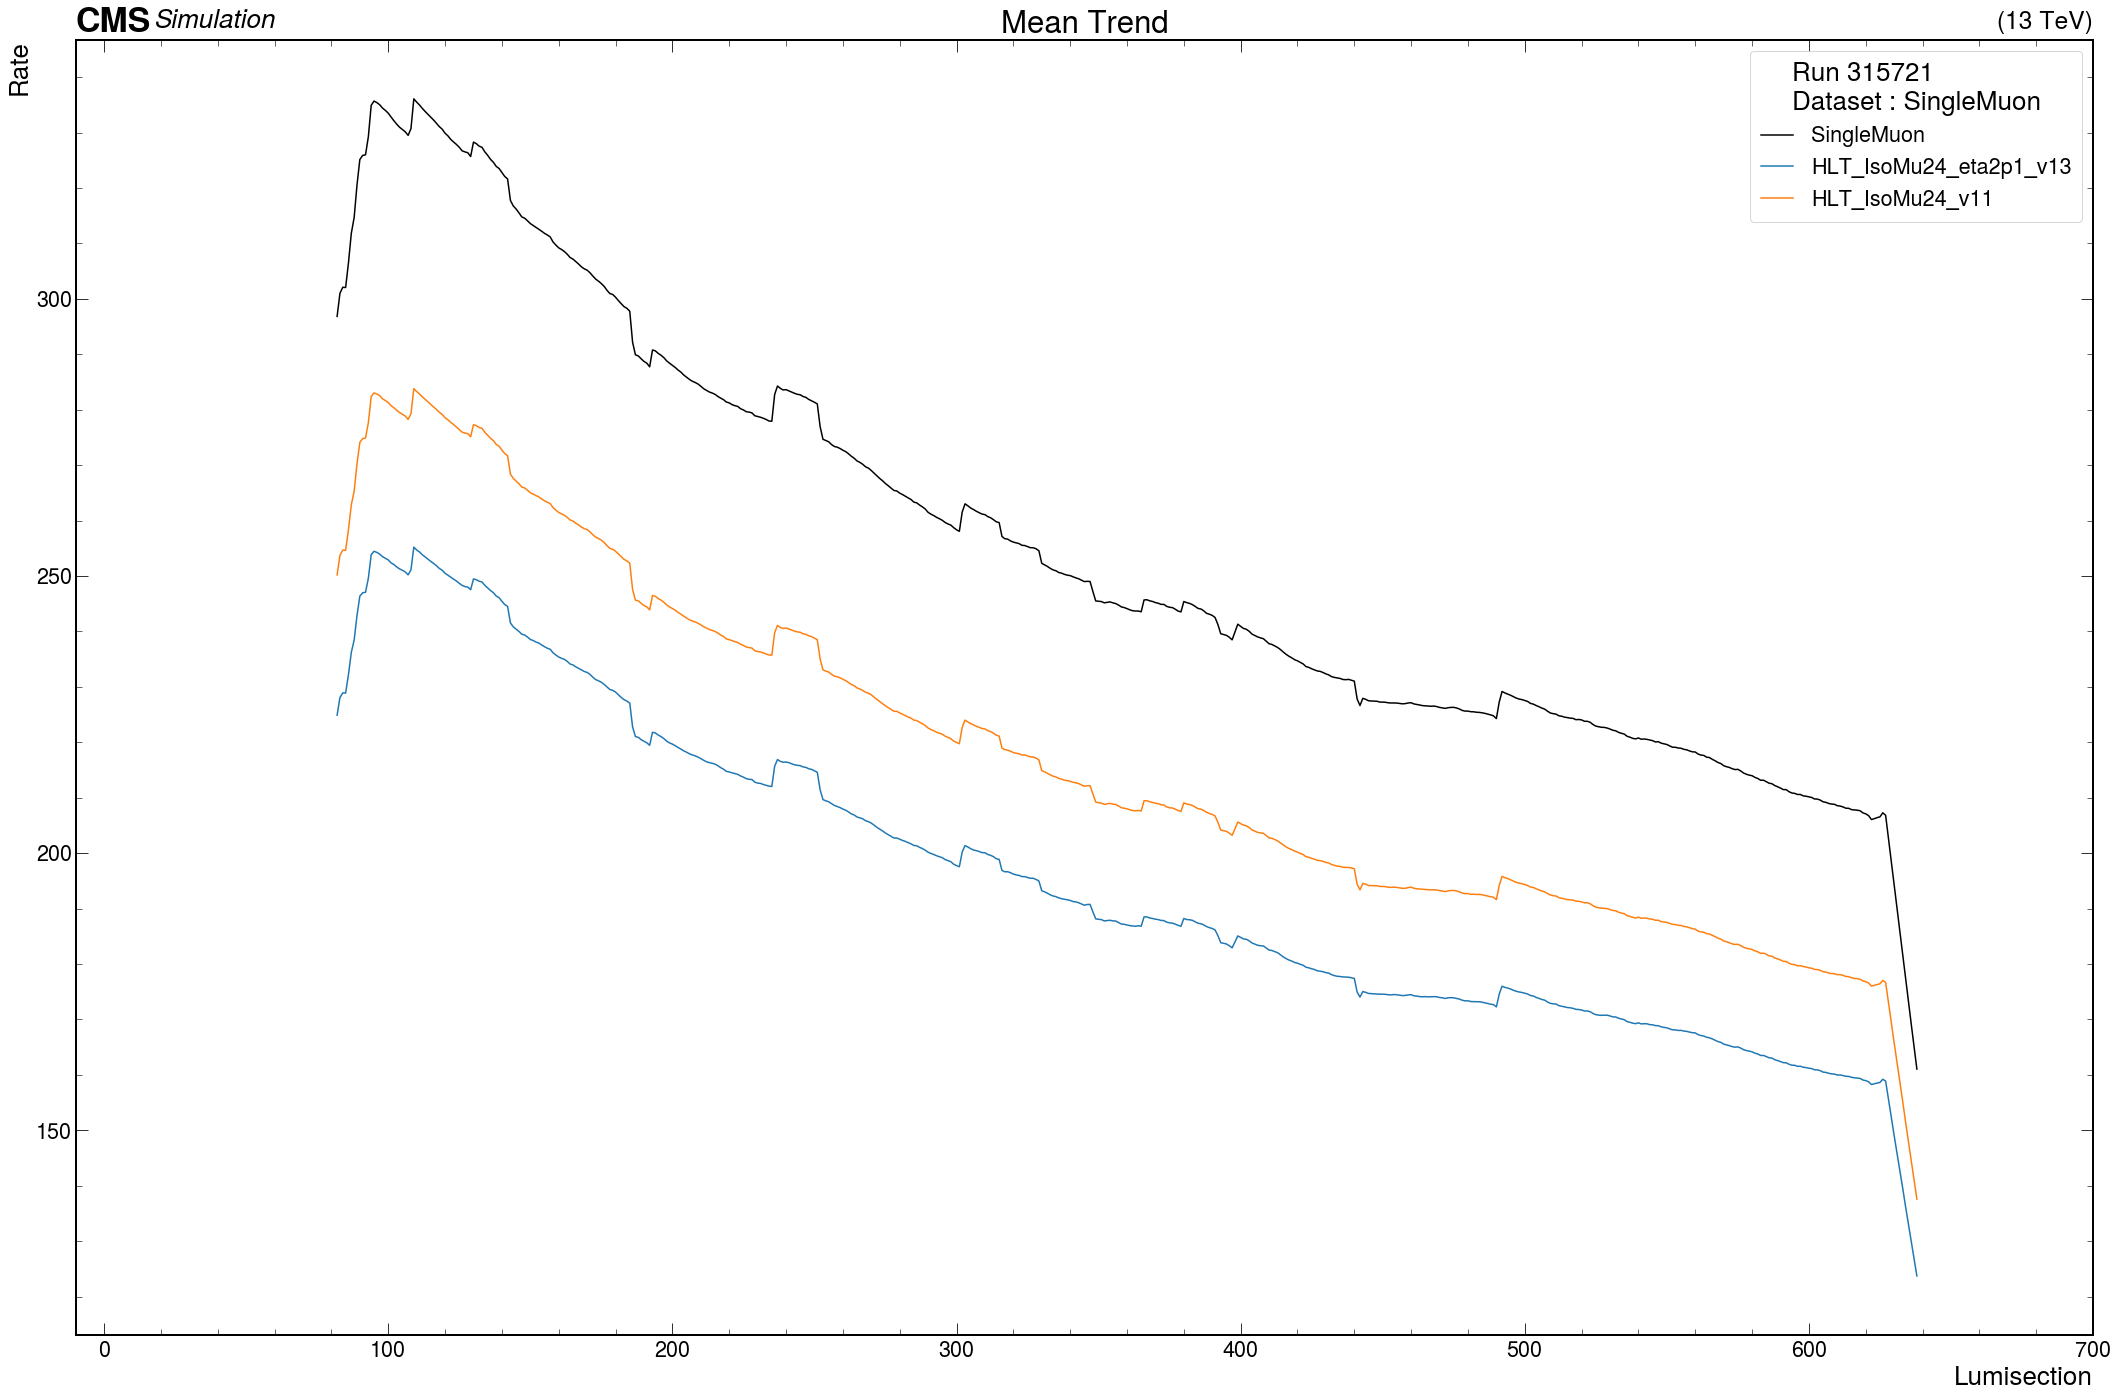

In [10]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"].rolling(window=50).mean(),label='SingleMuon',color='black')
for i in path_IsoMu24_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"].rolling(window=50).mean(),label=i)
#plt.yscale('log')
plt.title("Mean Trend")
ax.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
#plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)
plt.tight_layout()

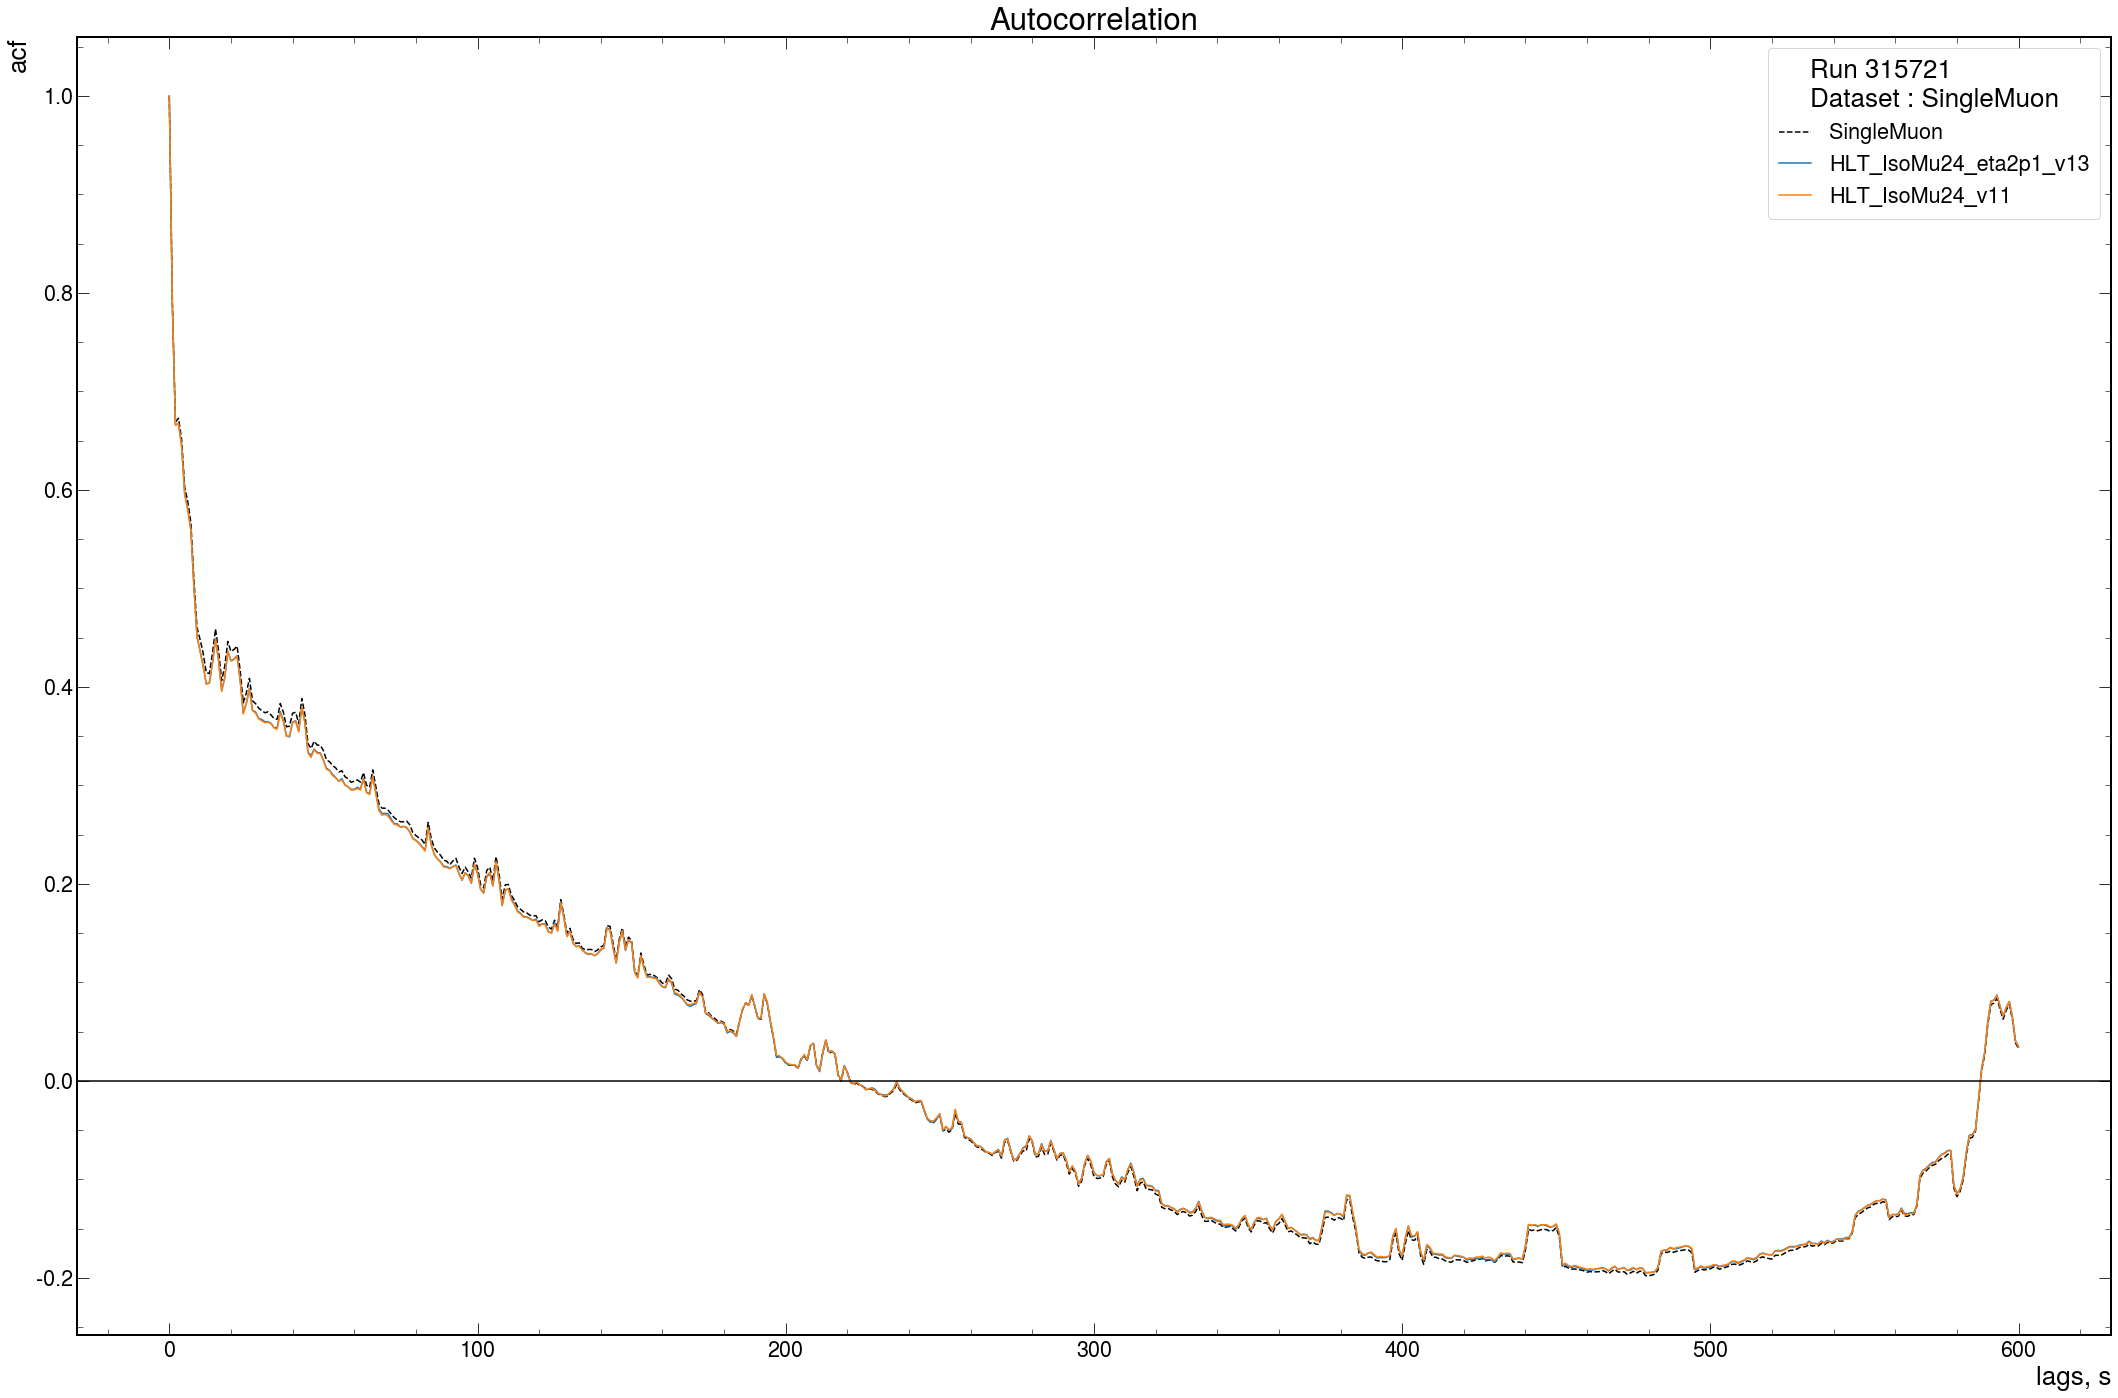

In [11]:
plt.subplots(figsize=(30,20))
plt.plot(acf(df_singlemuon['attributes.rate'],nlags=600,fft=False),label=df_singlemuon['attributes.dataset_name'][33],color='black',ls='--')
for i in path_IsoMu24_list:
    plt.plot(acf(df_singlemuon_dict[i]['attributes.rate'],nlags=600,fft=False),label=i)
plt.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
plt.title('Autocorrelation')
plt.xlabel('lags, s')
plt.ylabel('acf')
plt.axhline(color='black')
plt.tight_layout()

## 3. HLT IsoMu20 



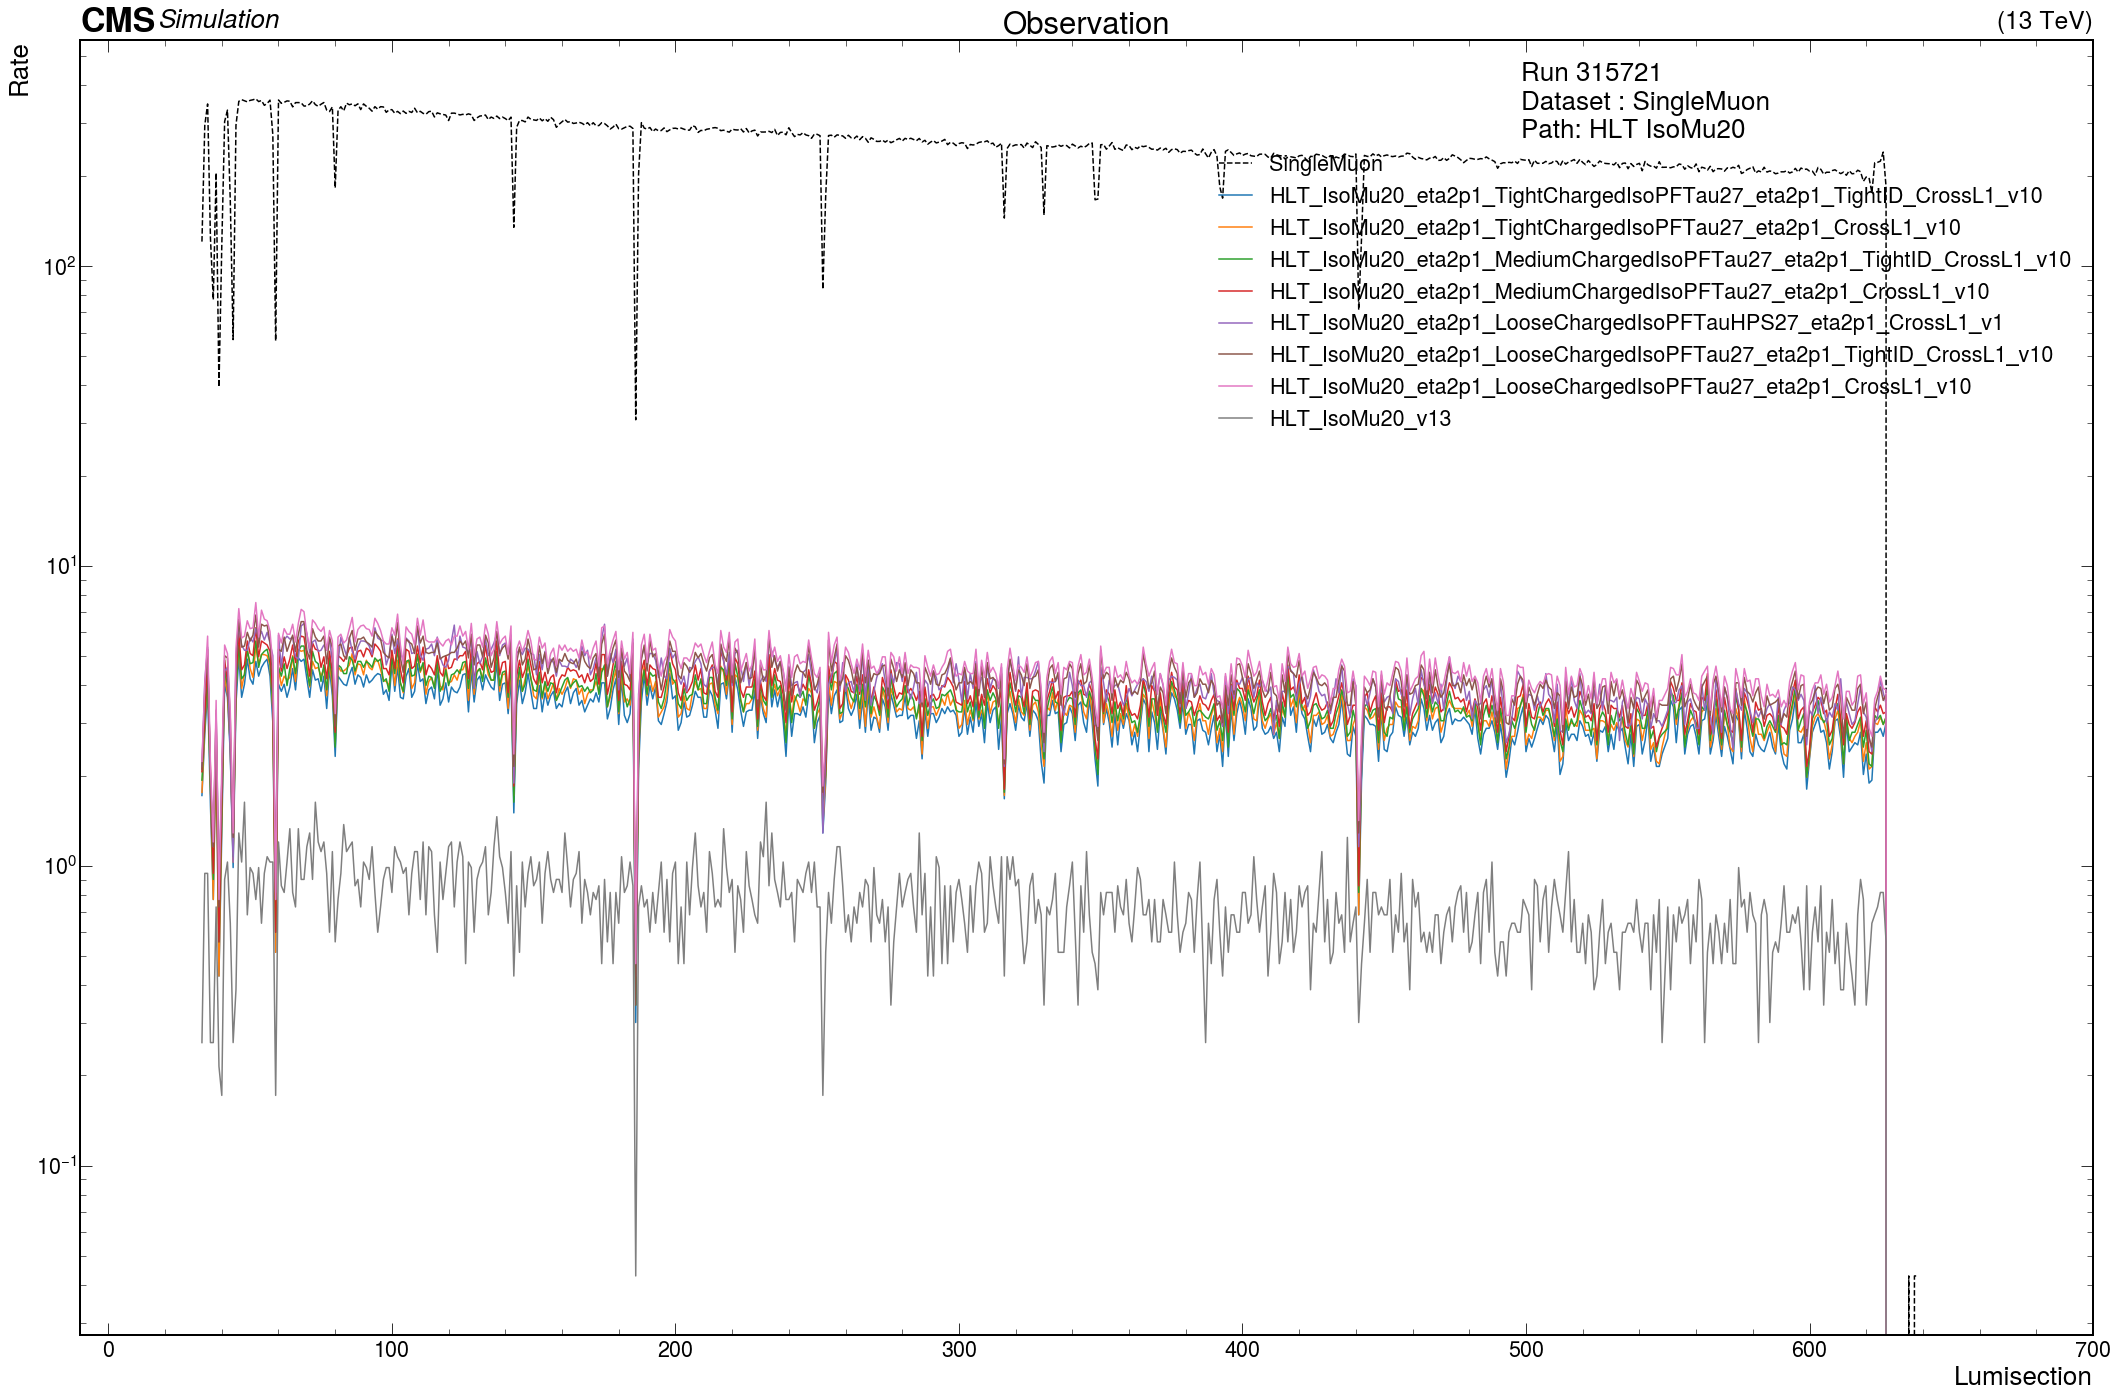

In [12]:
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
path_IsoMu20_list=['HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10'
                ,'HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10'
                ,'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10'
                ,'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10'
                ,'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1'
                ,'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10'
                ,'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10'
                ,'HLT_IsoMu20_v13' 
                ]
plt.plot(df_singlemuon['attributes.rate'],label='SingleMuon',color='black',ls='--')
for i in path_IsoMu20_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"],label=i)
plt.yscale('log')
plt.title("Observation")
plt.legend(loc=1,title='Run 315721\nDataset : SingleMuon\nPath: HLT IsoMu20')
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)
plt.tight_layout()

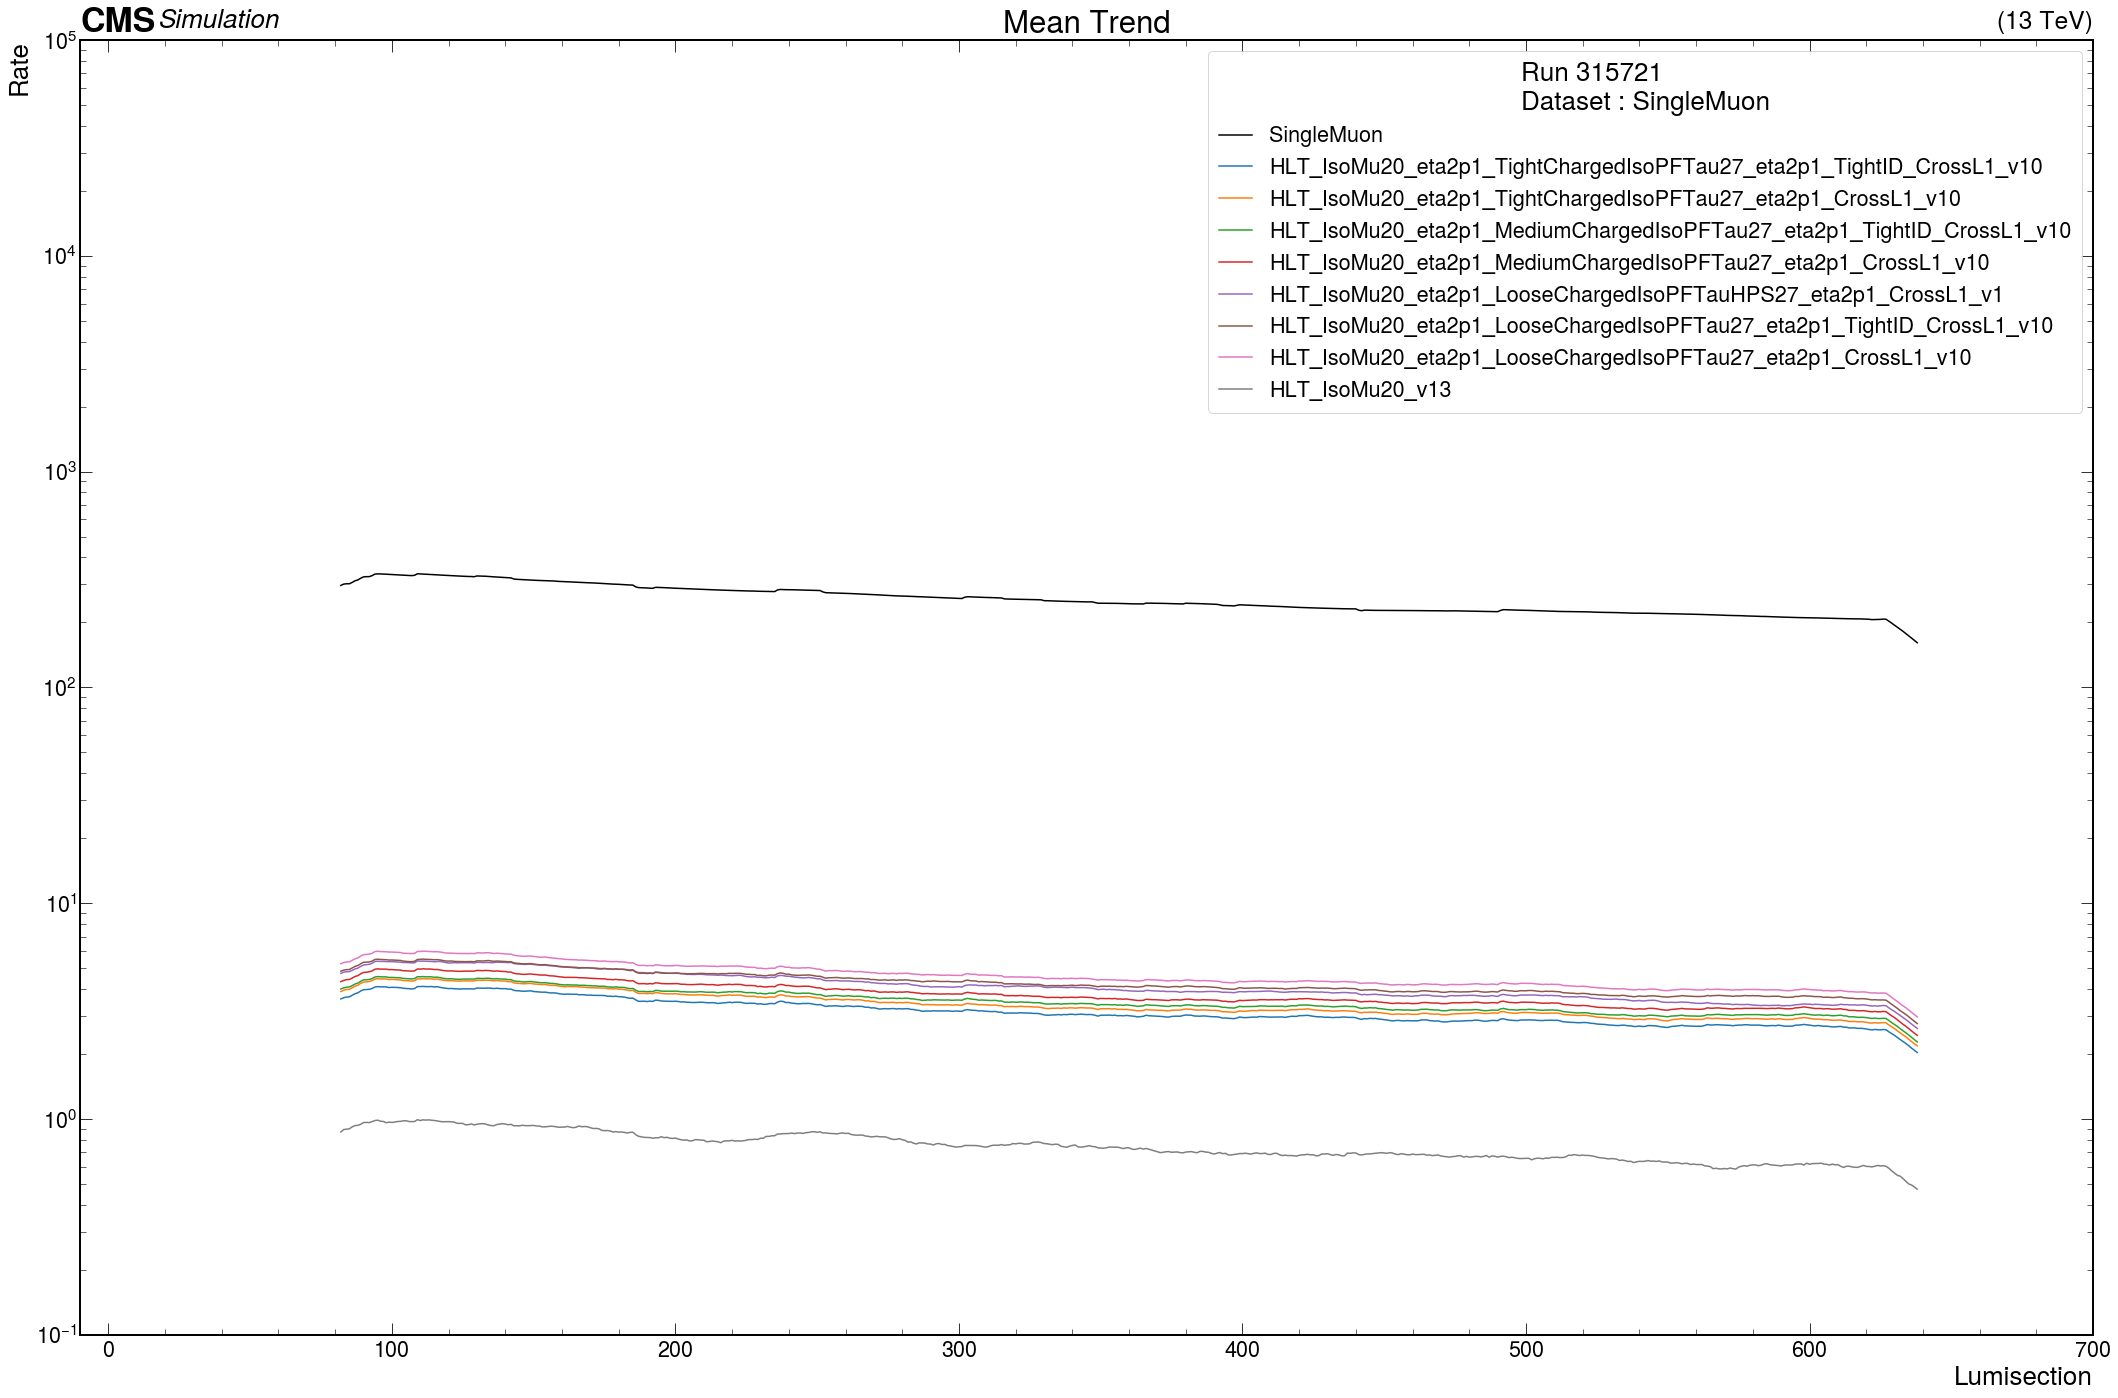

In [13]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"].rolling(window=50).mean(),label='SingleMuon',color='black')
for i in path_IsoMu20_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"].rolling(window=50).mean(),label=i)
plt.yscale('log')
plt.title("Mean Trend")
ax.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
#plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)
plt.ylim(0.1,100000)
plt.tight_layout()

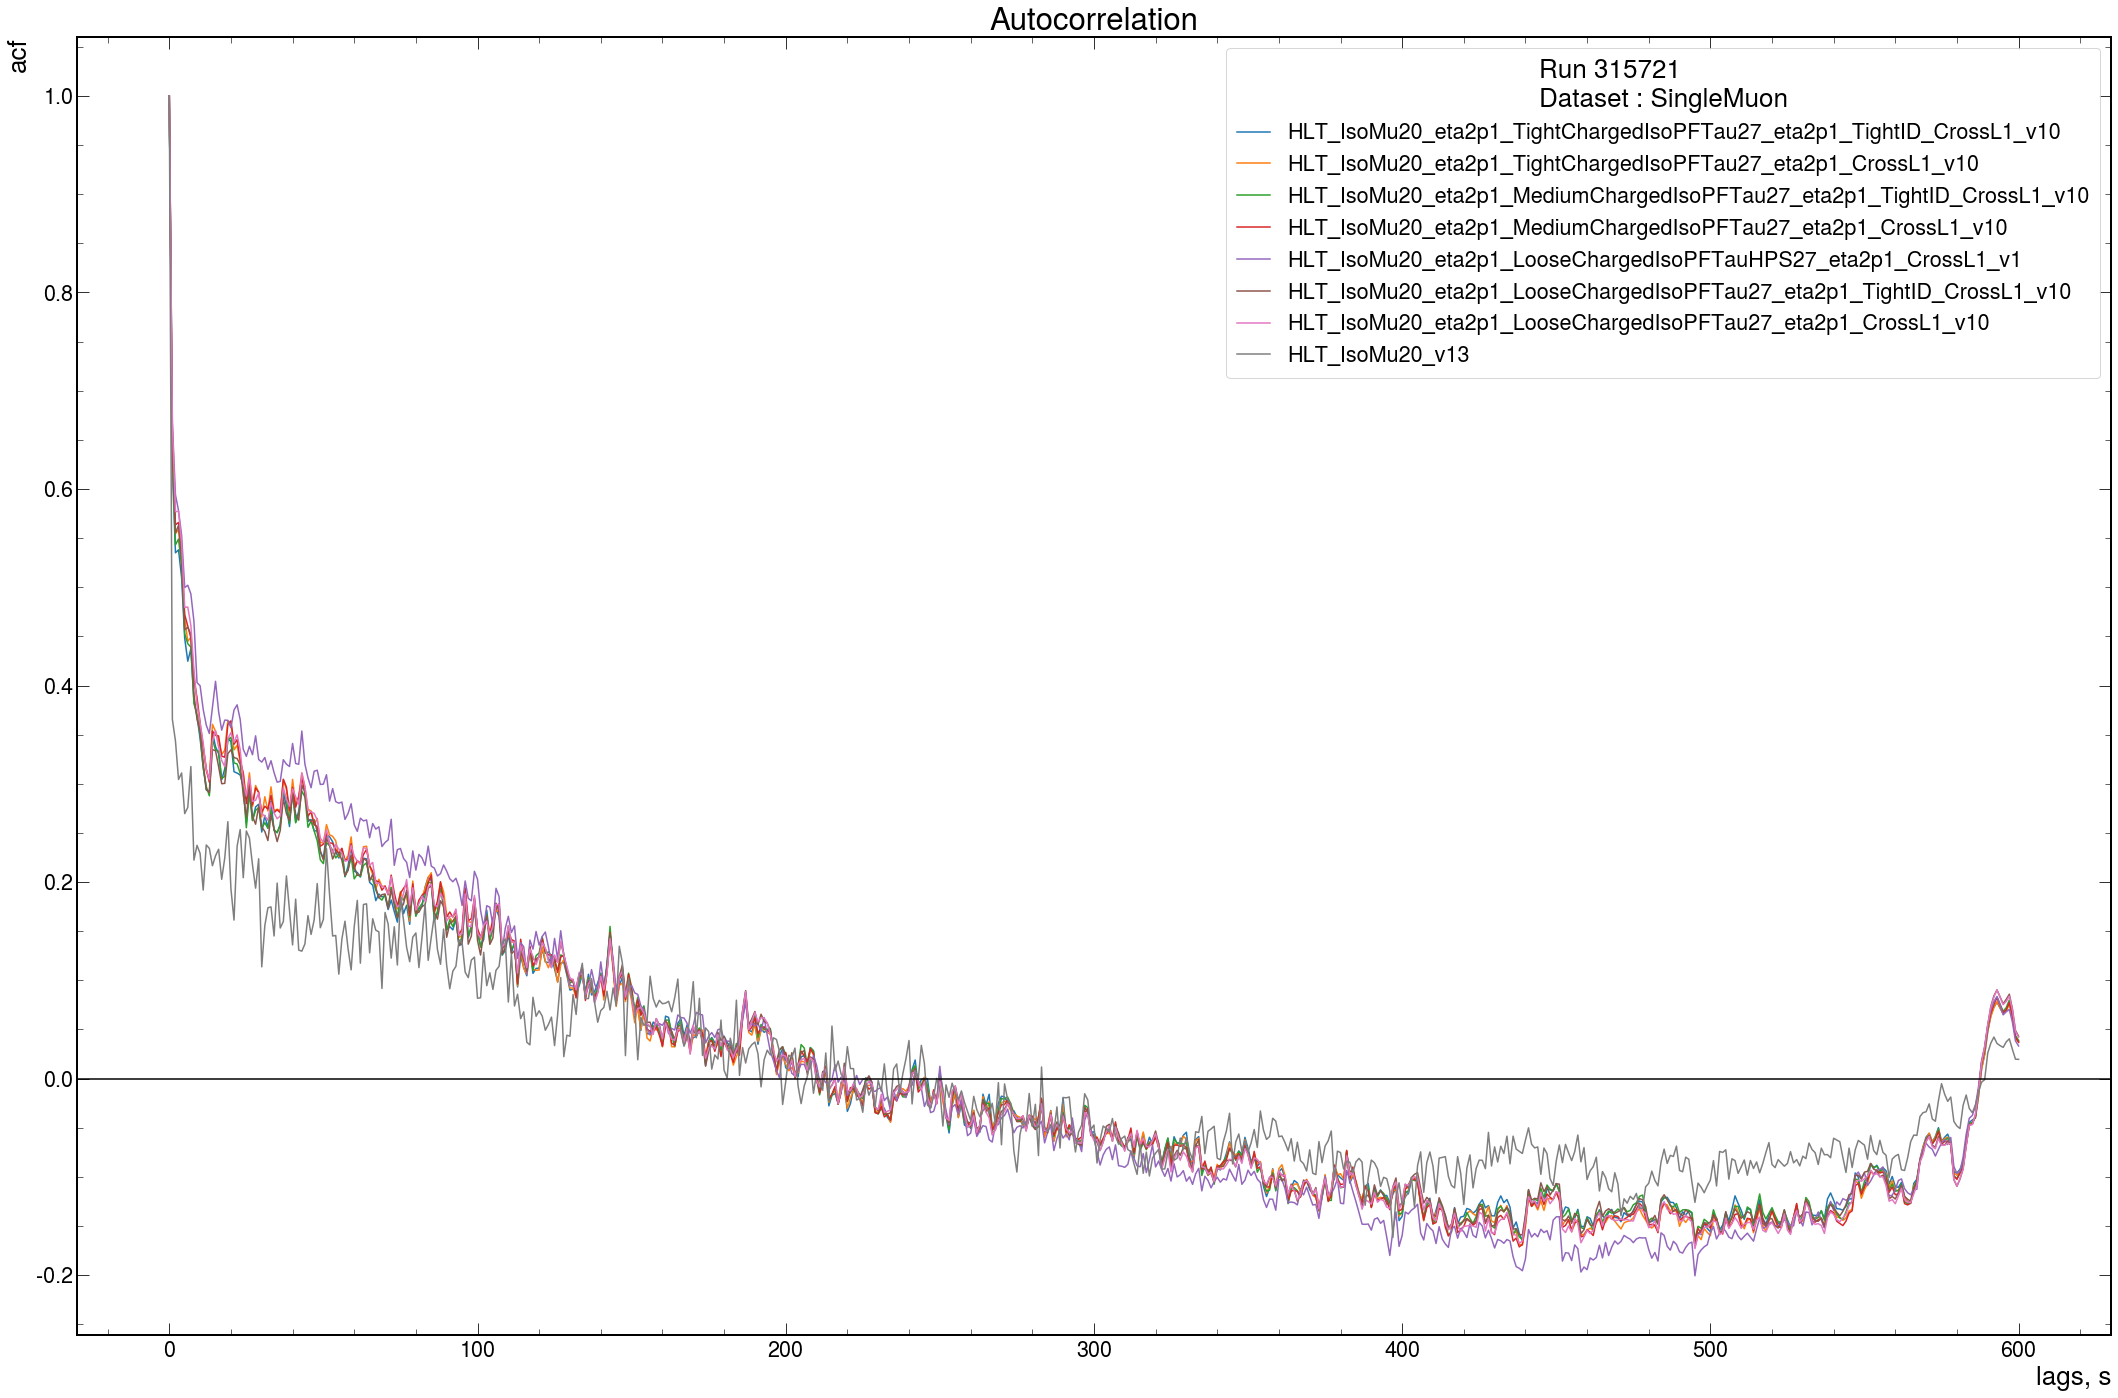

In [14]:
plt.subplots(figsize=(30,20))
#plt.plot(acf(df_singlemuon['attributes.rate'],nlags=600,fft=False),label=df_singlemuon['attributes.dataset_name'][33],color='black',ls='--')
for i in path_IsoMu20_list:
    plt.plot(acf(df_singlemuon_dict[i]['attributes.rate'],nlags=600,fft=False),label=i)
plt.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
plt.title('Autocorrelation')
plt.xlabel('lags, s')
plt.ylabel('acf')
plt.axhline(color='black')
plt.tight_layout()